In [43]:
import pandas as pd
import seaborn as sns

In [44]:
crime_df = pd.read_csv('../combined_data_clean.csv')
crime_df.head()

,id,Price,Address,zip,status,mls,Subdivision,Year Built,Bedrooms,Bathrooms,Approx SQFT,CrimeRate
0,1,427167,3231 W MARYLAND AVE,85017,Active,6395749,WEST PLAZA 6 LOT 614-787,1958,3,2.0,1302.0,4.1
1,2,400000,5109 E THOMAS RD,85018,Active,6243667,PAPAGO VILLAGE,1943,0,0.0,1358.0,2.2
2,3,399900,8020 W STELLA AVE,85303,Active,6384821,SHALIMAR,1997,3,2.0,1505.0,0.0
3,4,349000,6944 W Verde LN,85033,Active,6395738,MARYVALE TERRACE NO. 49,1983,3,3.0,1514.0,3.0
4,5,419000,4105 W PASADENA AVE,85019,Active,6395732,TU-DOR ESTATES,1971,4,2.0,1908.0,2.5


In [46]:
edu_df = pd.read_csv('../education_by_zip.csv')
edu_df.head()

,Zip,Elem_School_District,Hightest_Rated_School
0,85003,Phoenix Elementary,94.44
1,85004,Phoenix Elementary,94.44
2,85006,Phoenix Elementary,94.44
3,85007,Phoenix Elementary,94.44
4,85008,Balsz,81.79


In [47]:
crime_school_df = crime_df.merge(edu_df, left_on='zip', right_on='Zip')
crime_school_df.head()

,id,Price,Address,zip,status,mls,Subdivision,Year Built,Bedrooms,Bathrooms,Approx SQFT,CrimeRate,Zip,Elem_School_District,Hightest_Rated_School
0,1,427167,3231 W MARYLAND AVE,85017,Active,6395749,WEST PLAZA 6 LOT 614-787,1958,3,2.00,1302.0,4.1,85017,Alhambra,100.04
1,33,320000,4144 N 29TH DR,85017,Active,6395529,MISSION MANOR 2,1952,4,2.00,1356.0,4.1,85017,Alhambra,100.04
2,176,345000,2921 W HIGHLAND AVE,85017,UCB (Under Contract-Backups),6389042,NORTHWEST VILLAGE 2,1953,4,2.00,1272.0,4.1,85017,Alhambra,100.04
3,204,354000,6019 N 32ND DR,85017,Active,6348070,MARYVALE PARK 5 AMD,1954,3,2.00,1220.0,4.1,85017,Alhambra,100.04
4,242,335000,3318 W SELLS DR,85017,Active,6388293,LYNNHAVEN PLAT 2,1954,3,1.75,1404.0,4.1,85017,Alhambra,100.04


In [48]:
crime_school_df.drop('Zip', axis=1, inplace=True)

In [49]:
crime_school_df.head()

,id,Price,Address,zip,status,mls,Subdivision,Year Built,Bedrooms,Bathrooms,Approx SQFT,CrimeRate,Elem_School_District,Hightest_Rated_School
0,1,427167,3231 W MARYLAND AVE,85017,Active,6395749,WEST PLAZA 6 LOT 614-787,1958,3,2.00,1302.0,4.1,Alhambra,100.04
1,33,320000,4144 N 29TH DR,85017,Active,6395529,MISSION MANOR 2,1952,4,2.00,1356.0,4.1,Alhambra,100.04
2,176,345000,2921 W HIGHLAND AVE,85017,UCB (Under Contract-Backups),6389042,NORTHWEST VILLAGE 2,1953,4,2.00,1272.0,4.1,Alhambra,100.04
3,204,354000,6019 N 32ND DR,85017,Active,6348070,MARYVALE PARK 5 AMD,1954,3,2.00,1220.0,4.1,Alhambra,100.04
4,242,335000,3318 W SELLS DR,85017,Active,6388293,LYNNHAVEN PLAT 2,1954,3,1.75,1404.0,4.1,Alhambra,100.04


In [50]:
# crime_school_df.to_csv('crime_school.csv', index_label='id')

In [68]:
zip_list=[]
pricepersf={}
for zip in crime_school_df['zip']:
    if zip not in zip_list:
        zip_list.append(zip)
        price= crime_school_df.groupby(['zip']).mean()['Price']
        sf=crime_school_df.groupby(['zip']).mean()['Approx SQFT']
    df_zip=crime_school_df.loc[(crime_school_df['zip']==zip)]    
    
    
    pricepersf['price_per_sqf']=round(price/sf, 2)
    pricepersf['school_rating']=crime_school_df.groupby(['zip']).mean()['Hightest_Rated_School'] 
    pricepersf['crime_rate']=crime_school_df.groupby(['zip']).mean()['CrimeRate']

price_school_crime_df = pd.DataFrame.from_dict(pricepersf)
price_school_crime_df.head(10)


,price_per_sqf,school_rating,crime_rate
zip,,,
85003,383.97,94.44,1.1
85004,373.08,94.44,1.2
85006,375.96,94.44,1.9
85007,372.06,94.44,1.6
85008,321.51,81.79,4.5
85009,263.56,65.70,4.0
85012,370.81,72.93,0.6
85013,379.48,72.93,2.0
85014,378.93,97.13,1.9


In [75]:
price_school_crime_df = price_school_crime_df.reset_index()
price_school_crime_df.head()

,level_0,index,zip,price_per_sqf,school_rating,crime_rate
0,0,0,85003,383.97,94.44,1.1
1,1,1,85004,373.08,94.44,1.2
2,2,2,85006,375.96,94.44,1.9
3,3,3,85007,372.06,94.44,1.6
4,4,4,85008,321.51,81.79,4.5


In [78]:
price_school_crime_df = price_school_crime_df.drop(columns=['level_0'])
price_school_crime_df.head()

,zip,price_per_sqf,school_rating,crime_rate
0,85003,383.97,94.44,1.1
1,85004,373.08,94.44,1.2
2,85006,375.96,94.44,1.9
3,85007,372.06,94.44,1.6
4,85008,321.51,81.79,4.5


In [73]:
price_school_crime_df.loc[(price_school_crime_df['zip']==85008)]

,index,zip,price_per_sqf,school_rating,crime_rate
4,4,85008,321.51,81.79,4.5


<AxesSubplot:>

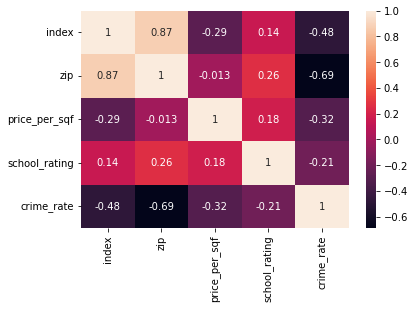

In [74]:
sns.heatmap(price_school_crime_df.corr(), annot=True)